# Exploration, Cleaning and Preparation Process

In this notebook the training and test data set will be first prepared for implementation in an machine learning process.

## Import

In [1]:
#Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#Files
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## Training Set Exploration

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(df_train)

891

In [5]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The differen columns look good so far. Different scales might require conversion to a format that is interpretable by ML models.

In [6]:
#Finding NaN values in all columns with a liitle function
def count_nan(list):
    for col in list.columns:
        nans = len(list[col])-list[col].count()
        print("There are " + str(nans) + " missing values in " + col)
        
count_nan(df_train)

There are 0 missing values in PassengerId
There are 0 missing values in Survived
There are 0 missing values in Pclass
There are 0 missing values in Name
There are 0 missing values in Sex
There are 177 missing values in Age
There are 0 missing values in SibSp
There are 0 missing values in Parch
There are 0 missing values in Ticket
There are 0 missing values in Fare
There are 687 missing values in Cabin
There are 2 missing values in Embarked


"Age" unfortunately has a problematicly high number of missing values (177/891 ~= 20%). Cabin could be already dropped due to a huge likelyhood of insignificance but an exploration could make it more clear.

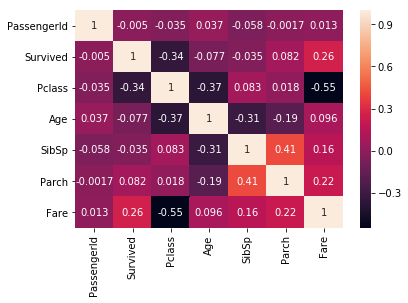

In [7]:
#Correlation between numeric features of the dataframe
sns.heatmap( df_train.corr(), annot = True )

First of all this heatmap shows us that there is a low but existing correlation between the the target "Survived" and two features "Pclass" and "Fare". Other numeric features could be assed later can be excluded from the analysis.

The second thing that becomes visible is that "Fare" and "Pclass" are neatively correlated. This means that passengers in a higher class had to pay more for their ticket, which is expectable. For our analysis it is essential to have mostly independant features. Because of that we have to decide which feature might be better for our further analysis.

## Passenger Class

Pclass          1         2         3       All
Survived                                       
0         0.37037  0.527174  0.757637  0.616162
1         0.62963  0.472826  0.242363  0.383838
Pclass           1         2         3
Survived                              
0         0.145719  0.176685  0.677596
1         0.397661  0.254386  0.347953
All       0.242424  0.206510  0.551066


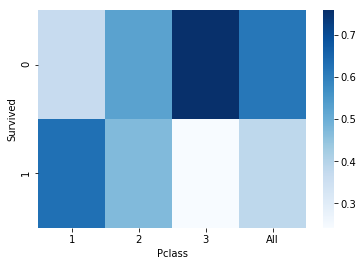

In [8]:
crossSPc1 = pd.crosstab(df_train["Survived"], df_train["Pclass"], margins= True, normalize = "columns")

crossSPc2 = pd.crosstab(df_train["Survived"], df_train["Pclass"], margins= True, normalize = "index")

print(crossSPc1)
print(crossSPc2)

#Heatmap
sns.heatmap(crossSPc1, cmap = "Blues")

In [9]:
#for train set
df_train["PC1"] = df_train["Pclass"] == 1
df_train["PC1"].replace([False, True],[0,1], inplace= True)

df_train["PC2"] = df_train["Pclass"] == 2
df_train["PC2"].replace([False, True],[0,1], inplace= True)

df_train["PC3"] = df_train["Pclass"] == 3
df_train["PC3"].replace([False, True],[0,1], inplace= True)

#for test set
df_test["PC1"] = df_test["Pclass"] == 1
df_test["PC1"].replace([False, True],[0,1], inplace= True)

df_test["PC2"] = df_test["Pclass"] == 2
df_test["PC2"].replace([False, True],[0,1], inplace= True)

df_test["PC3"] = df_test["Pclass"] == 3
df_test["PC3"].replace([False, True],[0,1], inplace= True)

## Fare

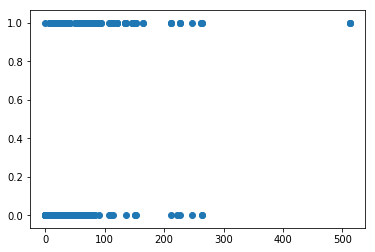

In [10]:
#plotting with target
plt.scatter(df_train["Fare"], df_train["Survived"])

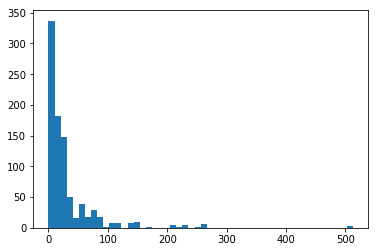

In [11]:
plt.hist(df_train["Fare"], bins = 50)
plt.show()

In [12]:
fare_list= []
for e in df_train["Fare"]:
    if e <= 10:
        fare_list.append("u10")
    elif 10 < e <= 20:
        fare_list.append("b1020")
    elif 20 < e <= 30:
        fare_list.append("b2030")
    elif 30 < e <= 40:
        fare_list.append("b3040")
    elif 40 < e <= 60:
        fare_list.append("b4060")
    elif 60 < e <= 80:
        fare_list.append("b6080")
    elif 80 < e <= 100:
        fare_list.append("b80100")
    elif 100 < e <= 200:
        fare_list.append("b100200")
    elif 200 < e <= 300:
        fare_list.append("b200300")
    else:
        fare_list.append("g300")
        
df_train["cat_fare"] = fare_list

Frequencies:

In [13]:
surv_rate_fare = []
weights_fare = []
pc_fare = []
for e in df_train["cat_fare"].unique():
    pc_split = []
    selection = df_train.loc[df_train["cat_fare"] == e, :]
    freq = sum(selection["Survived"])/len(selection["Survived"])
    #frequencies for comparison
    freq_pc1= len(selection.loc[selection["Pclass"] == 1, :])/len(selection)
    freq_pc2= len(selection.loc[selection["Pclass"] == 2, :])/len(selection)
    freq_pc3= len(selection.loc[selection["Pclass"] == 3, :])/len(selection)
    weight = [len(selection), e]
    #Appending variables defined in this function:
    pc_split.append(freq_pc1)
    pc_split.append(freq_pc2)
    pc_split.append(freq_pc3)
    #Appending to parts outside this function:
    surv_rate_fare.append(freq)
    weights.append(weight)
    pc_fare.append(pc_split)

NameError: name 'weights' is not defined

In [14]:
surv_rate_fare

[0.19940476190476192]

Comparing now the actual survivalrate with the survivalrate explained by the Pclass

In [15]:
#Survival rate per class
mcSPc1 = np.matrix(crossSPc1.loc[1, [1,2,3]])
mcSPc1

matrix([[0.62962963, 0.47282609, 0.24236253]])

In [16]:
pot_surv_rat = []
for e in pc_fare:
    surv_rat = mcSPc1 * np.matrix(e).transpose()
    pot_surv_rat.append(surv_rat)

pot_surv_rat

[]

In [17]:
comp_list = []
for e in surv_rat_fare:
    ind = surv_rat_fare.index(e)
    deviation = (pot_surv_rat[ind]-e)/e
    comp_list.append(deviation)
    
comp_list
    

NameError: name 'surv_rat_fare' is not defined

In [18]:
weights

NameError: name 'weights' is not defined

Interesting groups: u10 (significatly lower), b1020 (slightly higher), b2030 (slightly lower), b100200 (slightly higher), b80100 (significantly higher), g300 (significantly higher).
These could be aggregated into two groups:
Under 10 and Over 100
Two new features can be aggregated from this.
(Does Sex play a role ?)

## Age

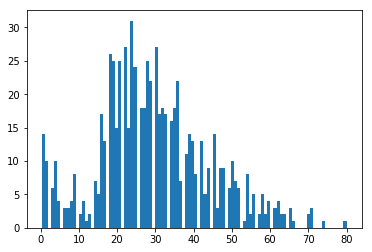

In [19]:
df_age = df_train.loc[df_train["Age"].isnull() == False, :]

plt.hist(df_age["Age"], bins=100)
plt.show()

Three groups:
below 15 (1)
15 to 50 (2)
above 50 (3)

In [20]:
age_list = []
for a in df_age["Age"]:
    if a <= 15:
        age_list.append(1)
    elif 15 < a <= 50:
        age_list.append(2)
    else:
        age_list.append(3)
        
df_age["cat_age"] = age_list

C:\Users\Laszlo Kuehl\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [21]:
surv_rate_age = []
weights_age = []
pc_age = []

for g in df_age["cat_age"].unique():
    pc_split = []
    selection = df_age.loc[df_age["cat_age"] == g, :]
    freq = sum(selection["Survived"])/len(selection["Survived"])
    #for comparison
    freq_pc1= len(selection.loc[selection["Pclass"] == 1, :])/len(selection)
    freq_pc2= len(selection.loc[selection["Pclass"] == 2, :])/len(selection)
    freq_pc3= len(selection.loc[selection["Pclass"] == 3, :])/len(selection)
    weight = [len(selection), g]
    #Appending Inner:
    pc_split.append(freq_pc1)
    pc_split.append(freq_pc2)
    pc_split.append(freq_pc3)
    #Appending Outer:
    surv_rate_age.append(freq)
    weights_age.append(weight)
    pc_age.append(pc_split)

surv_rate_age

[0.3862433862433862, 0.34375, 0.5903614457831325]

In [22]:
mcSPc1 = np.matrix(crossSPc1.loc[1, [1,2,3]])
mcSPc1

matrix([[0.62962963, 0.47282609, 0.24236253]])

In [23]:
pot_surv_rate = []
for e in pc_age:
    surv_rate = mcSPc1 * np.matrix(e).transpose()
    pot_surv_rate.append(surv_rate)

pot_surv_rate

[matrix([[0.39516517]]), matrix([[0.53236831]]), matrix([[0.32311446]])]

In [24]:
comp_list_age = []
for e in surv_rate_age:
    ind = surv_rate_age.index(e)
    deviation = (pot_surv_rate[ind]-e)/e
    comp_list_age.append(deviation)
    
comp_list_age

[matrix([[0.02309885]]), matrix([[0.54870782]]), matrix([[-0.45268368]])]

The groups 2 and 3 have a interesting deviation which seems to be quite huge.
Group 3 has a better chance of suriving than only their class might indicate.
(What about interdependence with "Sex"?)


In [25]:
sex_freq_list = [] 

for g in df_age["cat_age"].unique():
    selection = df_age.loc[df_age["cat_age"] == g, :]
    freq_male= len(selection.loc[selection["Sex"] == "male", :])/len(selection)
    freq_female= 1 - freq_male
    sex_freq_list.append([freq_male, freq_female])

sex_freq_list

[[0.6455026455026455, 0.35449735449735453],
 [0.734375, 0.265625],
 [0.4819277108433735, 0.5180722891566265]]

In [26]:
#avarage survival per sex
df_sex = pd.DataFrame(crossSS)
crossSS_new = df_sex.loc[["male" , "female"], 1]
crossSS_new = np.matrix(crossSS_new)

NameError: name 'crossSS' is not defined

In [27]:
pot_surv_rate = []
for e in sex_freq_list:
    surv_rate = crossSS_new * np.matrix(e).transpose()
    pot_surv_rate.append(surv_rate)

pot_surv_rate

NameError: name 'crossSS_new' is not defined

In [28]:
#deviations
comp_list_sex = []
for e in surv_rate_age:
    ind = surv_rate_age.index(e)
    deviation = (pot_surv_rate[ind]-e)/e
    comp_list_sex.append(deviation)
    
comp_list_sex

IndexError: list index out of range

As we will have a look later on the feature Sex this is sort of a preview. What can be mentioned is that the age group of those over 50 ahve a higher survival rate than the other groups and it cannot be explained why by looking at their class or their sex.

In [29]:
df_train["Over_50"] = df_train["Age"] > 50
df_train["Over_50"].replace([False, True],[0,1], inplace= True)

df_test["Over_50"] = df_test["Age"] > 50
df_test["Over_50"].replace([False, True],[0,1], inplace= True)

## Embarked

In [30]:
df_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
df_train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Pclass           1         2         3
Embarked                              
C         0.505952  0.101190  0.392857
Q         0.025974  0.038961  0.935065
S         0.197205  0.254658  0.548137
All       0.240720  0.206974  0.552306
Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957
All       0.617548  0.382452


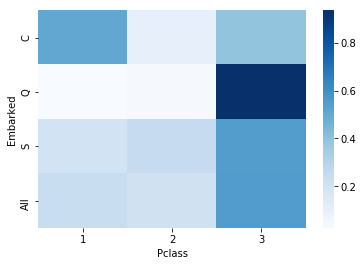

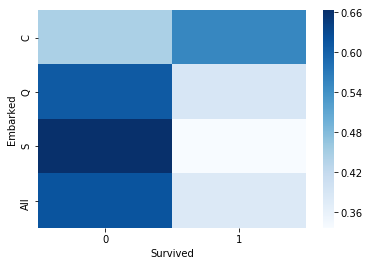

In [37]:
nonnanselection = df_train[df_train["Embarked"].isnull() == False].index.tolist()

Embarked = df_train.loc[nonnanselection,:]

crossEPc = pd.crosstab(Embarked["Embarked"], Embarked["Pclass"], margins= True, normalize = "index")
crossES = pd.crosstab(Embarked["Embarked"], Embarked["Survived"], margins= True, normalize = "index")
print(crossEPc)
print(crossES)
plt.subplots(1,1)
sns.heatmap(crossEPc, cmap = "Blues")
plt.subplots(1,1)
sns.heatmap(crossES, cmap = "Blues")

In [32]:
#Matrix for the classes
CmcEPc = np.matrix(crossEPc.loc["C",[1,2,3]]).transpose()
SmcEPc = np.matrix(crossEPc.loc["S",[1,2,3]]).transpose()
QmcEPc = np.matrix(crossEPc.loc["Q",[1,2,3]]).transpose()

#Survival rate per class
mcSPc1 = np.matrix(crossSPc1.loc[1, [1,2,3]])

By multiplying these matrizes it will become visible which classes could be dropped for the analysis. If the survival rate of a class can be explained by the multiplication of the avarage survival rate for each class weighed by the composition (relative frequencies of classes) at each embarkment point.

In [33]:
print(mcSPc1 * CmcEPc/crossES.loc["C", 1]-1)
print(mcSPc1 * SmcEPc/crossES.loc["S", 1]-1)
print(mcSPc1 * QmcEPc/crossES.loc["Q", 1]-1)

[[-0.16610227]]
[[0.12009407]]
[[-0.32907202]]


It can be seen that there exists a dependency between embarkmentin Southampton and Cherburgh and the Passenger classes of the respective passengers.
This means that from a causal point of view, passengers embarking in C had a bigger chance of survival than those embarking in S simply because they were more frequently in passenger class 1. (0.0 would mean that the suvival of a person at a given point can be describe 100% by the passenger class, which would render the inofrmation of embarkment useless)


What is curious on the other hand is that passengers embarking in Q have a "survival rate" close to the avarage of 38.38 %, EVENTHOUGH they are allocated to more than 90% in p-class 3 (avarage survival rate). The deviation of roughly -32.9 % means that up to one third of the better survival of passengers embarking at Q cannit be explained only by the passenger class.

This disparity could be explained by the fact, that some passengers of p-class 3 were located in the very back of the ship and some in the front, which hit the iceberg first. OR it is purely randomness caused by the separation of the underlying data into train and test sets. Only 77/891 = 8.64% of the observed embarkments happened in Queenstown.   

In [34]:
#adding new column
df_train["Queenstown"] = df_train["Embarked"]
df_train["Queenstown"].replace(["S","C","Q"],[0,0,1],inplace = True)
df_train["Queenstown"].fillna(0, inplace=True)

#check
print(df_train["Queenstown"].sum(), len(df_train["Queenstown"]))
df_train["Queenstown"].loc[df_train["Queenstown"].isnull()]

77.0 891


Series([], Name: Queenstown, dtype: float64)

# Cabin

In [35]:
p_room = df_train["Cabin"].value_counts()

(array([101.,   0.,   0.,  38.,   0.,   0.,   5.,   0.,   0.,   3.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

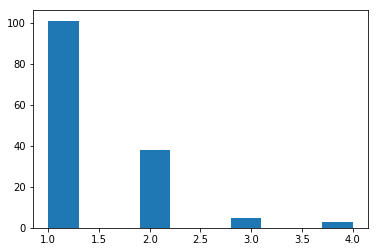

In [36]:
plt.hist(p_room)

In [37]:
df_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [38]:
Cnonnanselection = df_train[df_train["Cabin"].isnull() == False].index.tolist()

Cabin = df_train.loc[Cnonnanselection,:]

In [39]:
#Letter
cletter_col = []
for e in  Cabin["Cabin"]:
    letter = e[0]
    cletter_col.append(letter)

Cabin["CLetter"] = cletter_col
Cabin["CLetter"].head()

1     C
3     C
6     E
10    G
11    C
Name: CLetter, dtype: object

In [40]:
# "Passengers per room" - column 
p_room_dict = dict(zip(list(p_room.index), list(p_room)))
                  
p_room_col = []
for e in Cabin["Cabin"]:
    ppr = p_room_dict.get(e)
    p_room_col.append(ppr)
    
Cabin["PperRoom"] = p_room_col
Cabin["PperRoom"].head()

1     1
3     2
6     1
10    4
11    1
Name: PperRoom, dtype: int64

In [41]:
Cabin["CLetter"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: CLetter, dtype: int64

In [42]:
crossCLS = pd.crosstab(Cabin["CLetter"], Cabin["Survived"], margins= True, normalize = "index")
crossCLS

Survived,0,1
CLetter,,
A,0.533333,0.466667
B,0.255319,0.744681
C,0.406780,0.593220
D,0.242424,0.757576
E,0.250000,0.750000
F,0.384615,0.615385
G,0.500000,0.500000
T,1.000000,0.000000
All,0.333333,0.666667


E, D and B might be interesting, because they on avarage survive more often and are not as insignificant in number as are A,F,G and T.

In [43]:
crossCLPc = pd.crosstab(Cabin["CLetter"], Cabin["Pclass"], margins= True, normalize = "index")
crossCLPc

Pclass,1,2,3
CLetter,,,
A,1.000000,0.000000,0.000000
B,1.000000,0.000000,0.000000
C,1.000000,0.000000,0.000000
D,0.878788,0.121212,0.000000
E,0.781250,0.125000,0.093750
F,0.000000,0.615385,0.384615
G,0.000000,0.000000,1.000000
T,1.000000,0.000000,0.000000
All,0.862745,0.078431,0.058824


It is quite obvious that the letter on the ticket correlates with the Pclass and that E,D, B tickets are largely held by passengers in the first class. 

In [44]:
Cabin["PperRoom"].value_counts()

1    101
2     76
3     15
4     12
Name: PperRoom, dtype: int64

In [45]:
crossPPRS = pd.crosstab(Cabin["PperRoom"], Cabin["Survived"], margins= True, normalize = "index")
crossPPRS

Survived,0,1
PperRoom,,
1,0.425743,0.574257
2,0.223684,0.776316
3,0.266667,0.733333
4,0.333333,0.666667
All,0.333333,0.666667


In [46]:
crossPPRPc = pd.crosstab(Cabin["PperRoom"], Cabin["Pclass"], margins= True, normalize = "index")
crossPPRPc

Pclass,1,2,3
PperRoom,,,
1,0.940594,0.019802,0.039604
2,0.921053,0.026316,0.052632
3,0.200000,0.800000,0.000000
4,0.666667,0.000000,0.333333
All,0.862745,0.078431,0.058824


Unfortunately these tables dont offer an interesting conclusion such as "The survival rate of couples was higher than those travelling only on their own" or "Families were given seats in rescue vessels more frequent than others". This is due to the scarcity of the data and the "correlation" with the feature "Pclass".

## Ticket

In [47]:
df_train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [48]:
#Letter
letter_col = []
for e in  df_train["Ticket"]:
    letter = e[0]
    letter_col.append(letter)
  
print(len(letter_col))
letter_col = pd.DataFrame(letter_col)
letter_col[0].value_counts()

891


3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: 0, dtype: int64

In [49]:
crossTS = pd.crosstab(letter_col[0], df_train["Survived"], margins= True, normalize = "index")
crossTS

Survived,0,1
0,,
1,0.369863,0.630137
2,0.535519,0.464481
3,0.760797,0.239203
4,0.800000,0.200000
5,1.000000,0.000000
6,0.833333,0.166667
7,0.888889,0.111111
8,1.000000,0.000000
9,0.000000,1.000000


In [50]:
crossTPc = pd.crosstab(letter_col[0], df_train["Pclass"], margins= True, normalize = "index")
crossTPc 

Pclass,1,2,3
0,,,
1,0.897260,0.020548,0.082192
2,0.021858,0.650273,0.327869
3,0.046512,0.016611,0.936877
4,0.000000,0.000000,1.000000
5,0.333333,0.000000,0.666667
6,0.333333,0.000000,0.666667
7,0.000000,0.000000,1.000000
8,0.000000,0.000000,1.000000
9,0.000000,0.000000,1.000000


The interpretation here is not very easy. Most of the significant disparities can already be explained by "Pclass".
For applying a prediction model this feature will therefore be dropped.

## Sex

In [51]:
crossSS = pd.crosstab(df_train["Sex"], df_train["Survived"], margins= True, normalize = "index")
crossSS

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


In [52]:
crossSS2 = pd.crosstab(df_train["Sex"], df_train["Pclass"], margins= True, normalize = "index")
crossSS2

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386
All,0.242424,0.206510,0.551066


The disparity between male and female passengers regarding rate of survival is quite striking. 
These findings shows that though they died, they died as gentlemen!

Feature "Sex" is also indepent from feature "Pclass" and it will be therefore included in our analysis. 

## Dropping

In [53]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PC1,PC2,PC3,cat_fare,Over_50,Queenstown
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,u10,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,b6080,0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,u10,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,b4060,0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,u10,0,0.0


In [54]:
df_train = df_train.drop(["Embarked", "Cabin","PassengerId", "SibSp", "Parch", "Name", "Ticket", "cat_fare", "Age", "Fare"],  axis=1)

df_train.head()

,Survived,Pclass,Sex,PC1,PC2,PC3,Over_50,Queenstown
0,0,3,male,0,0,1,0,0.0
1,1,1,female,1,0,0,0,0.0
2,1,3,female,0,0,1,0,0.0
3,1,1,female,1,0,0,0,0.0
4,0,3,male,0,0,1,0,0.0


In [55]:
df_train = df_train.drop(["Pclass"], axis = 1)

In [56]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PC1,PC2,PC3,Over_50
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0


In [57]:
#df_test = pd.read_csv("test.csv")

#Adding new column 
df_test["Queenstown"] = df_test["Embarked"] 
df_test["Queenstown"].replace(["S","C","Q"],[0,0,1], inplace= True)
df_test["Queenstown"].fillna(0, inplace=True)


count_nan(df_test)

There are 0 missing values in PassengerId
There are 0 missing values in Pclass
There are 0 missing values in Name
There are 0 missing values in Sex
There are 86 missing values in Age
There are 0 missing values in SibSp
There are 0 missing values in Parch
There are 0 missing values in Ticket
There are 1 missing values in Fare
There are 327 missing values in Cabin
There are 0 missing values in Embarked
There are 0 missing values in PC1
There are 0 missing values in PC2
There are 0 missing values in PC3
There are 0 missing values in Over_50
There are 0 missing values in Queenstown


In [58]:
ID_col = list(df_test["PassengerId"])
ID_col = np.array(ID_col)
df_test = df_test.drop(["Pclass","Embarked", "Cabin","PassengerId", "SibSp", "Parch", "Name", "Ticket", "Age", "Fare"],  axis=1)

df_test.head()

,Sex,PC1,PC2,PC3,Over_50,Queenstown
0,male,0,0,1,0,1
1,female,0,0,1,0,0
2,male,0,1,0,1,1
3,male,0,0,1,0,0
4,female,0,0,1,0,0


## Prediction

Preprocessing / Feature Engineering

In [59]:
#turning sex column binary 
df_train["Sex"].replace(["male", "female"],[0,1], inplace= True)
df_test["Sex"].replace(["male", "female"],[0,1], inplace= True)

df_train.head()

,Survived,Sex,PC1,PC2,PC3,Over_50,Queenstown
0,0,0,0,0,1,0,0.0
1,1,1,1,0,0,0,0.0
2,1,1,0,0,1,0,0.0
3,1,1,1,0,0,0,0.0
4,0,0,0,0,1,0,0.0


filling Age with mean

In [61]:
#df_test.loc[df_test["Fare"].isnull(), "Fare"] = df_test["Fare"].mean()

#df_train.loc[df_train["Age"].isnull(), "Age"] = df_train["Age"].mean()
#df_test.loc[df_test["Age"].isnull(), "Age"] = df_test["Age"].mean()

In [62]:
#df_train = df_train.dropna()

In [63]:
#len(df_train)

In [64]:
df_train.head()

,Survived,Sex,PC1,PC2,PC3,Over_50,Queenstown
0,0,0,0,0,1,0,0.0
1,1,1,1,0,0,0,0.0
2,1,1,0,0,1,0,0.0
3,1,1,1,0,0,0,0.0
4,0,0,0,0,1,0,0.0


In [65]:
df_test.head()

,Sex,PC1,PC2,PC3,Over_50,Queenstown
0,0,0,0,1,0,1
1,1,0,0,1,0,0
2,0,0,1,0,1,1
3,0,0,0,1,0,0
4,1,0,0,1,0,0


Train-Test-Split

In [66]:
X_train, y_train, X_test = df_train.iloc[:,1:], df_train.iloc[:,0], df_test

## Applying models

In [67]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import neighbors

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

k_fold = KFold(891, n_folds=9, shuffle = True, random_state = 0) 

C:\Users\Laszlo Kuehl\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

C:\Users\Laszlo Kuehl\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



## LogistcRegression

In [68]:
log = LogisticRegression()
scores = cross_val_score(log, X_train,y_train, cv = k_fold, scoring ="accuracy")
round(np.mean(scores)*100, 2)

78.45

## GaussianProcessClassifier

In [69]:
gpc = GaussianProcessClassifier()
scores = cross_val_score(gpc, X_train,y_train, cv = k_fold, scoring ="accuracy")
round(np.mean(scores)*100, 2)

80.36

## GaussianNB

In [70]:
gnb = GaussianNB()
scores = cross_val_score(gnb, X_train,y_train, cv = k_fold, scoring ="accuracy")
round(np.mean(scores)*100, 2)

75.76

## KNeighborsClassifier

In [71]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train,y_train, cv = k_fold, scoring ="accuracy")
round(np.mean(scores)*100, 2)

78.68

## DecisionTreeClassifier

In [72]:
dtc = DecisionTreeClassifier()
scores = cross_val_score(dtc, X_train,y_train, cv = k_fold, scoring ="accuracy")
round(np.mean(scores)*100, 2)

80.13

## SVC

In [73]:
svm = SVC()
scores = cross_val_score(svm, X_train,y_train, cv = k_fold, scoring ="accuracy")
round(np.mean(scores)*100, 2)

77.67

## RandomForestClassifier

In [74]:
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, X_train,y_train, cv = k_fold, scoring ="accuracy")
round(np.mean(scores)*100, 2)

80.25

## Submissions

In [75]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred1 = rfc.predict(X_test)
Sub1 = pd.DataFrame({"PassengerId" : ID_col,"Survived" : y_pred1})
Sub1.to_csv("Sub1.csv", index = False)
Sub1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [76]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred2 = dtc.predict(X_test)
Sub2 = pd.DataFrame({"PassengerId" : ID_col,"Survived"  : y_pred2})
Sub2.to_csv("Sub2.csv", index = False)
Sub2.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [77]:
gpc = GaussianProcessClassifier()
gpc.fit(X_train,y_train)
y_pred3 = gpc.predict(X_test)
Sub3 = pd.DataFrame({"PassengerId" : ID_col,"Survived"  : y_pred3})
Sub3.to_csv("Sub3.csv", index = False)
Sub3.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [78]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred4 = knn.predict(X_test)
Sub4 = pd.DataFrame({"PassengerId" : ID_col,"Survived"  : y_pred4})
Sub4.to_csv("Sub4.csv", index = False)
Sub4.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
